# ** 2. Differentiation**

Calculating an analytical solution to a derivative is not always feasible or possible. In such a situation, we turn to numerical differentiation. This notebook discusses two numerical differentiation methods, the forward difference and central difference methods. 

In order to derive the forward and central difference formulas, we begin with a Taylor series:

$$ f(x)\ =\ f(a)\ +\ \frac{f'(a)}{1!}(x-a)\ +\ \frac{f''(a)}{2!}(x-a)^2\ +\ \frac{f'''(a)}{3!}(x-a)^3\ +\ \dots\ +\ \frac{f^{(n)}(a)}{n!}(x-a)^n\ + \dots$$

where $a$ is the point about which the series is expanded. Performing a substitution using $(x\ -\ a) = h$:

$$ f(x)\ =\ f(a)\ +\ \frac{f'(a)}{1!}h\ +\ \frac{f''(a)}{2!}h^2\ +\ \frac{f'''(a)}{3!}h^3\ +\ \dots\ +\ \frac{f^{(n)}(a)}{n!}h^n\ + \dots$$

Here, $h$ is the step size for the differentiation. The choice of $h$ must be taken with great care as it has the potential of introducing error rendering the solution incorrect and meaningless. The effects of this can be seen by considering the simple form of a derivative:

 $$f'(x)\ =\ \frac{f(x+h)-f(x)}{h}$$
 
A large value of $h$ will cause unrealistic results or a divergence as large steps neglect to capture the behavior of the function's derivative. On the other hand, a small value of $h$ introduces round-off errors because a computer can only store numbers to a certain precision (often ~ $10^{-15}$ for personal computers). A step size smaller than this precision will return incorrect results. Round-off error can be introduced into numerical methods in many ways:

1. Addition of nearly equal numbers
2. Subtracting a small number from a large number
3. Division of by a small number
3. User input error (pi = 3.1415)
4. Data type coding error

In differentiation, round-off errors results from the addition of nearly equal number. Thus an optimal value of $h$ exists which offers a trade off between the two forms of error.


## ** 2.1  Forward Difference Formula for First Derivatives **

In order to obtain the forward difference formula, the Taylor series is truncated after the first derivative term. 

This gives the following

$$ f(x)\ \approx\ f(a+h)\ =\ f(a)\ +\ hf'(a)\ +\ \mathcal{O}(h^2)$$

The $O(h^2)$ term might be new to some of you. This notation indicates the magnitude of the error introduced by truncating the Taylor series, For this reason it is referred to as the truncation error. Rearranging the above expression to isolate $f'(a)$, as shown below, represents the forward difference approximation:

$$ f'(a)\ =\ \frac{f(a+h)\ -\ f(a)}{h} + \mathcal{O}(h^2)$$

 

The code block below imports the necessary modules, defines the function we will evaluate, the corresponding analytical derivative, and the initial variables.


**An important note for this notebooks:** For this notebook, use the Sympy function to define additional functions. This means when you want to call to a function from the Sympy library, import them as `syp.sin()`, `syp.cos()`, `syp.exp(`). The Sympy package will help us calculate the analytical gradients using Python, enabling you to check errors of differentiation from the true result, but saving you the trouble from calculating them by hand.  

## Your task
1. The general structure of the function `f` is given. You need to code the actual function. To the right of `result =`, define the function $x^2$ remember that exponentiation is accomplished in Python with **

In [1]:
###########
# IMPORTS #
###########
# These are packages needed to perform the math and visualization
import numpy as np
import IPython
from IPython.display import Math
import matplotlib.pyplot as plt
import plotting_functions as pf
import sympy as syp
syp.init_printing(use_unicode=False, wrap_line=False, no_global=True)
%matplotlib notebook

#############
# FUNCTIONS #
#############


def f(x):
    """
    Defining the function to be evaluated
    INPUT
        float x
    OUTPUT
        float 
    """
    result = x**2
    return result


###############
# GLOBAL VARS #
###############
# point at which we would like to evaluate the derivative
x = 1.0
# step size: distance between x and a, dx
h = 1
# the range of x values we would like to plot between:
x_minimum = -1.5
x_maximum = 2
#exact derivative to compare our approximation to.
exact_first_derivative = pf.analytical_first_derivative(f,x)
exact_second_derivative = pf.analytical_second_derivative(f,x)
# dictionaries to hold error of each method
error_1 = dict()
error_2 = dict()

## Your Task!
1. Answer the following multiple choice question. To answer place the number of the correct choice in the Python function below.

### Question 1
This type of error will dominate when the step size is small:
      1. discretization error
      2. truncation error
      3. round-off error
      4. speculation error
      5. none of the above

In [2]:
pf.question_one_check()

Please input a valid response


The code implementing the forward difference approximation of $f(x)$ is shown below.  The Python code considers the value approximatedby the method and calculates the exact value to report the error.

In the plot below, a geometric interpretation of the forward difference approximation is given to the function you defined above.  Here, the tangent line through $f(a)$ is shown in blue. The approximation is shown between the $f(a)$ (blue point) and $f(a+h)$ (red point). The approximation to the first derivative is taken as the secant line between the two points, shown as the red line. A graphical representation of the forward difference approximation (in red) implemented on $f(x)$ (in black) is shown below. What you should notice is that the approximation, is not quite overlaid with the actual tangent line. You will also see a warning printed that our step size is too large. 

## Your Task
1. Set the step size to the value of h = 0.5  in the cell below. Has the approximation improved?
2. Set the step size to the value of h = 1e-5  in the cell below. Has the approximation improved?


                          The step size is too large
                       The answer below is not reliable
                        Truncation error will dominate
                         Please input a smaller value
            
Method: Forward Difference
Approximation of f'(1.0) = 2.5
Exact Evaluation of f'(1.0) = 2.0
Error = 0.5


/home/amanda/programs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


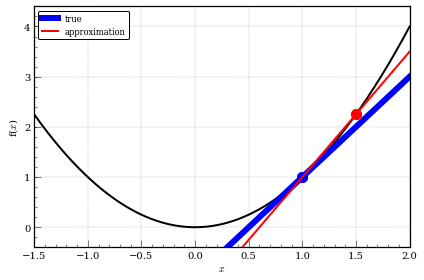

In [3]:
#############
# FUNCTIONS #
#############

def Forward_Diff(f, a, h):
    """
    Calculates the first derivative based on the Forward Difference method
    INPUT
        float a: the initial starting point
        float h: the step size
    OUTPUT
        float: first derivative evaluated at a
    """
    fd_step_size_result = pf.fd_step_size_check(f,h,a)
    print(fd_step_size_result['message'])
    return (f(a + h) - f(a)) / h


#############
# MAIN CODE #
#############
h = 0.5
approximation = Forward_Diff(f, x, h)
method = "Forward Difference"
error_1[method] = approximation - exact_first_derivative
print("Method: {}".format(method))
print("Approximation of f'({}) = {}".format(x, approximation))
print("Exact Evaluation of f'({}) = {}".format(x,exact_first_derivative))
print("Error = {}".format(error_1["Forward Difference"]))
#input variables are:
#(x minimum, x maximum, function, derivative of f, x, step size)

pf.plot_fdiff_func(x_minimum, x_maximum, f, pf.analytical_first_derivative, x, h)

## ** 2.2 Forward Difference Determination of Second Derivatives **

The forward difference method can be extended to second derivatives. This requires two points that are spaced by an interval of $h$, $x = a+h$ and $x= a+2h$.
Each of these terms are expanded into their respective Taylor series:

$x=a+h$
$$f(a+h) = f(a)+ f'(a)(h) + \frac{f''(a)(h)^2}{2} + \mathcal{O}(h^3)$$

$$f'(a)= \frac{f(a+h) - f(a) - \frac{f''(a)(h)^2}{2}}{h} + \mathcal{O}(h^3)$$

$x=a+2h$
$$ f(a+2h) = f(a)+ f'(a)(2h) + \frac{f''(a)(2h)^2}{2} + \mathcal{O}(h^3)$$

  

$$ f'(a)= \frac{f(a+2h)- f(a) -f''(a)(2h^2)}{2h} + \mathcal{O}(h^3)$$

We can set these two terms equal to each other:

$$\frac{f(a+h) - f(a) - \frac{f''(a)(h)^2}{2}}{h} + \mathcal{O}(h^3)=\frac{f(a+2h)- f(a) -f''(a)(2h^2)}{2h} + \mathcal{O}(h^3)$$
multiply by $2h$ on both sides,

$$2f(a+h) - 2f(a) - f''(a)(h)^2=f(a+2h)- f(a) -f''(a)(2h^2) + \mathcal{O}(h^3)$$

collect the like terms, isolating $f''(a)$

$$f''(a)(2h^2) - f''(a)(h)^2= f(a+2h) -2f(a+h)+ 2f(a) -f(a)  + \mathcal{O}(h^3)$$

Simplifying this expression results in:
$$ f''(a)\ =\ \frac{f(a+2h)-2f(a+h)+f(a)}{h^2} + \mathcal{O}(h^3)$$

## Your Task 
1. Answer the following multiple choice question. To answer place the number of the correct choice in the Python function below.

### Question 2
The $\mathcal{O}(h^3)$ term at the end of the forward difference approximation __
      1. represents that this approximation requires three points, one in the center and one to each side.
      2. represents the round-off error introduced.
      3. represents exactly the error of all remaining terms in the infinite Taylor series.
      4. approximately represents the discretization error introduced by truncating the Taylor series.
      5. none of the above

In [4]:
pf.question_two_check(4)

Correct! By truncating the Taylor series, we are loosing information of higher derivatives. This loss can cause inaccuracies in the approximations of derivatives. This notation represents where the Taylor series is truncated.


In [5]:
###########
# IMPORTS #
###########
import numpy as np
#############
# FUNCTIONS #
#############


def Forward_Diff_2nd(f, a, h):
    """
    Calculates the second derivative based on the forward difference method
    INPUT
        float a: the initial starting point
        float h: the step size
    OUTPUT
        float: second derivative evaluated at a
    """
    return (f(a + 2 * h) - 2 * f(a + h) + f(a)) / (h**2)
#############
# MAIN CODE #
#############
approximate = Forward_Diff_2nd(f, x, h)
method = "Forward Difference"
error_2[method] = approximate - exact_second_derivative
print("Method: {}".format(method))
print("Approximation of f''({}) = {}".format(x, approximate))
print("Exact Evaluation of f''({}) = {}".format(x, exact_second_derivative))
print("Error = {}".format(error_2["Forward Difference"]))

Method: Forward Difference
Approximation of f''(1.0) = 2.0
Exact Evaluation of f''(1.0) = 2
Error = 0.0


## ** 2.3  Central Difference Formula for First Derivatives**

The forward difference formula is one estimation of the derivative, but introduces large truncation error and thus we want to consider more accurate methods. The central difference formula can also provide useful approximation for first derivatives with a reduction of truncation error.  In order to obtain this relationship, one takes two similar Taylor expressions as shown above for the forward difference formula. the difference being that the negative direction is considered along with the forward. This will capture behavior of the curve surrounding the expansion point. 

$$ f(a+h)\ =\ f(a)\ +\ hf'(a)\ +\ \frac{h^2}{2}f''(a)\ +\ \ \mathcal{O}(h^3) $$

$$ f(a-h)\ =\ f(a)\ -\ hf'(a)\ +\ \frac{h^2}{2}f''(a)\ +\ \ \mathcal{O}(h^3) $$

Subtracting the second Taylor series expression from the first gives:

$$ f(a+h)\ -\ f(a-h)\ =\ 2hf'(a)  + \mathcal{O}(h^3)$$

We rearrange and isolate for $f'(a)$:

$$ f'(a)\ =\ \frac{f(a+h)\ -\ f(a-h)}{2h} +\mathcal{O}(h^3)$$
 

The code implementing the central difference approximation on $f(x)$ is shown below. The Python code determines the true value to calculate the error associated with the central difference approximation. 

In [6]:
#############
# FUNCTIONS #
#############


def Central_Diff(f, a, h):
    """
    Calculates the second derivative based on the central difference method
    INPUT
        float a: the initial starting point
        float h: the step size
    OUTPUT
        float: first derivative evaluated at a
    """
    cd_step_size_result = pf.cd_step_size_check(f,h,x)
    print(cd_step_size_result['message'])
    return (f(a + h) - f(a - h)) / (2 * h)

#############
# MAIN CODE #
#############
approximation = Central_Diff(f, x, h)
method = "Central Difference"
error_1[method] = approximation - exact_first_derivative
print("Method: {}".format(method))
print("Approximation of f'({}) = {}".format(x, approximation))
print("Exact Evaluation of f'({})  = {}".format(x,exact_first_derivative))
print("Error = {}".format(error_1["Central Difference"]))


                          The step size is too large
                       The answer below is not reliable
                        Truncation error will dominate
                         Please input a smaller value
            
Method: Central Difference
Approximation of f'(1.0) = 2.0
Exact Evaluation of f'(1.0)  = 2.0
Error = 0.0


A graphical representation of the central difference approximation of the first dervative shows after the plotting command below is ran. In the plot, $a$ is the red point with the tangent line at $(a,\ f(a))$ shown in blue representing the analytical value of the derivative at that point. The central difference approximation occurs at $(a+h,\ f(a+h))$ and $(a-h,\ f(a-h))$, the red points. The red line is the secant line. By comparison of the two methods, we see that the central differnce method gives a much better approximation of the first derivative as compared to the forward difference method.

/home/amanda/programs/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


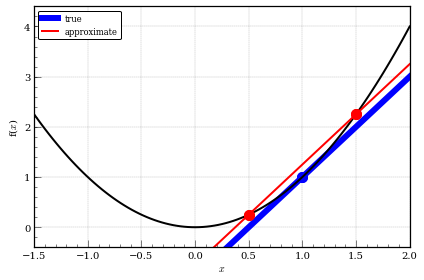

In [7]:
#input variables are:
#(x minimum, x maximum, function, derivative of f, x, step size)
pf.plot_cdiff_func(x_minimum, x_maximum, f, pf.analytical_first_derivative, x, h)

## ** 2.4  Central Difference Formula for Second Derivatives **

The previously discussed central difference formula can also be utilized to approximate the second derivative of a function.  Taking our two Taylor series expressions from above:

$$ f(a+h)\ =\ f(a)\ +\ hf'(a)\ +\ \frac{h^2}{2}f''(a)\ +\ \frac{h^3}{6}f'''(a)\ +\ \mathcal{O}(h^4) $$

$$ f(a-h)\ =\ f(a)\ -\ hf'(a)\ +\ \frac{h^2}{2}f''(a)\ -\ \frac{h^3}{6}f'''(a)\ +\ \mathcal{O}(h^4) $$

we add these expressions in this case as opposed to the subtraction that was used to obtain the central difference formula for first derivatives.  Upon addition, we obtain:

$$ f(a+h)\ +\ f(a-h)\ =\ 2f(a)\ +\ h^2f''(a)\ +\ \mathcal{O}(h^4) $$

Rearrange and isolate for $f''(a)$ to obtain:

$$ f''(a)\ =\ \frac{f(a+h)\ -\ 2f(a)\ +\ f(a-h)}{h^2} + \mathcal{O}(h^4) $$

The following Python code illustrates the central difference formula applied to the same function discussed previously. The Python code determines the true value to calculate the error associated with the central difference approximation.

In [8]:
#############
# FUNCTIONS #
#############


def Central_Diff_2nd(f, a, h):
    """
    Calculates the second derivative based on the Central Difference method
    INPUT
        float a: the initial starting point
        float h: the step size
    OUTPUT
        float: second derivative evaluated at a
    """
    return (f(a + h) - 2 * f(a) + f(a - h)) / (h**2)
#############
# MAIN CODE #
#############
approximation = Central_Diff_2nd(f, x, h)
method = "Central Difference"
error_2[method] = approximation - exact_second_derivative
print("Method: {}".format(method))
print("Approximation of f''({}) = {}".format(x, approximation))
print("Exact Evaluation of f''({}) = {}".format(x,exact_second_derivative))
print("Error = {}".format(error_2["Central Difference"]))

Method: Central Difference
Approximation of f''(1.0) = 2.0
Exact Evaluation of f''(1.0) = 2
Error = 0.0


# 2.5 Results Summary

In [9]:
print("{:-^39}".format(""))
print("{:^39}".format("FIRST DERIVATIVE"))
print("{:-^39}".format(""))
print("{:^25} : {:^11}".format("Method", "Error"))
print("{:->25}   {:->11}".format("", ""))
for i in sorted(error_1, key=error_1.get, reverse=True):
    print( "{:>25} : {:>.5E}".format(i, error_1[i]))
print( "{:-^39}".format(""))

print("")
print("")

print("{:-^39}".format(""))
print("{:^39}".format("SECOND DERIVATIVE"))
print("{:-^39}".format(""))
print("{:^25} : {:^11}".format("Method", "Error"))
print("{:->25}   {:->11}".format("", ""))
for i in sorted(error_2, key=error_2.get, reverse=True):
    print("{:>25} : {:>.5E}".format(i, error_2[i]))
print("{:-^39}".format(""))


---------------------------------------
           FIRST DERIVATIVE            
---------------------------------------
         Method           :    Error   
-------------------------   -----------
       Forward Difference : 5.00000E-01
       Central Difference : 0.00000E+00
---------------------------------------


---------------------------------------
           SECOND DERIVATIVE           
---------------------------------------
         Method           :    Error   
-------------------------   -----------
       Forward Difference : 0.00000E+00
       Central Difference : 0.00000E+00
---------------------------------------


One should observe the significant improvement that central difference provides over forward difference. This improvement comes with a reduction in discretization error. Recall that the error is on the order of $ \mathcal{O}(h^2) $ for forward difference, while the  order is $\mathcal{O}(h^3)$ for central difference. Thus for a given step size, central difference will have a lower error and is generally be a better choice for discretization. 

# 2.6 Black Body Radiation

Black body radiation is the electromagnetic radiation (light) given off by an opaque object that is in thermal equilibrium with its surroundings.
Describing black body radiation was a monumental problem at the turn of the 20th century.
Classical physics predicted that distribution of emitted light would approach infinity as the wavelength decreased (see the dotted line in the first plot before).
This distribution is the Rayleigh-Jeans law:

$$ B(\lambda, T ) = \frac{2 c k_B T}{\lambda^4} $$

where B is spectral radiance, $\lambda$ is the wavelength of the light, $c$ is the speed of light, $k_B$ is Boltzmann's constant, and $T$ is the temperature.

However, this behavior would contradict the principle of conservation of energy.
This is known as the ultraviolet catastrophe.
Quantum mechanics properly describes black bod radiation.

The proper distribution of spectral radiance is given by

$$B(\lambda, T ) = \frac{2hc^2}{\lambda^5} \frac{1}{e^{\frac{hc}{\lambda k_B T}}-1}$$

where $h$ is Planck's constant, $\lambda$ is the wavelength of the light, $c$ is the speed of light, $k_B$ is Boltzmann's constant, and $T$ is the temperature.
 
## Your Task
1. Run the code block below to observe the distribution of wavelengths corresponding to the Rayleigh-Jeans law (yellow), and the true distribution (blue line). Notice the erroneous intensity predicted by the Rayleigh-Jeans classically as the wavelength decreases. The true distribution ( blue line) has a maximum intensity that can be found where the first derivative is zero. This interactive plot finds the derivative at points specified by the user. Move the sliding bar for the wavelength to see the derivative numerically and graphically (dotted line). You will use this interactive graph to complete the exercise below.

In [10]:
from IPython.html.widgets import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import scipy.constants as sc

def Central_Diff(f, a, h,temperature):
    """
    Calculates the second derivative based on the Central Difference method
    INPUT
        float a: the initial starting point
        float h: the step size
    OUTPUT
        float: first derivative evaluated at a
    """
    a *= 1e-9 # m to nm
    h *= 1e-9 # m to nm
    step_size_result=cd_step_size_result = pf.cd_step_size_check(f,h,a)
    if step_size_result['result'] == True:
        print(step_size_result['message'])
        return (f(a + h,temperature) - f(a - h,temperature)) / (2 * h)
    else:
        print(step_size_result['message'])
    return (f(a + h,temperature) - f(a - h,temperature)) / (2 * h)


# Black body radiation
def black_body_radiation(wavelength,T):
    """
    Calculates the spectral radiance based on black-body radiation formula
    INPUT:
        wavelength (float): the wavelength in nm
        T (float): in Kelvin
    OUTPUT:
     spectral_raidance (float): spectral radience in units of () 
    """
    h = sc.h # Planck's law units = J s
    c = sc.c # units = m s^-1
    k = sc.k # Boltzmann's constant units J K^-1
    numerator = 2.0 * h * (c**2)
    exponent = (h*c)/(wavelength*k*T)
    denominator = (wavelength**5) * (np.exp(exponent) - 1.0)
    spectral_radiance = numerator / denominator
    spectral_radiance *= 1e-9 # m to nm
    spectral_radiance *= 1e-3 # W to kW
    return spectral_radiance # units kw/nm

def RayleighJeans(wavelength,T):
    """
    Calculates the spectral radiance based ton the Rayleigh-Jeans formula
    INPUT:
        wavelength (float): the wavelength in m
        T (float): in Kelvin
    """
    h = sc.h # units = Js
    c = sc.c #units = ms^-1
    k = sc.k # units J K^-1
    numerator = 2*c*k*T
    denominator = wavelength**4
    spectral_radiance = numerator/denominator
    spectral_radiance *= 1e-9 # m to nm
    spectral_radiance *= 1e-3 # W to kW
    return spectral_radiance
    

# Set up variables
def plyt(T,lmbda):
    wavelength = np.linspace(1e-8, 3e-6, 100)
    # calculate spectral radiance
    radiance = black_body_radiation(wavelength, T)
    rj_radiance = RayleighJeans(wavelength, T)
    #calculate the central difference derivative
    step_size = 1e-6
    derivative = Central_Diff(black_body_radiation, lmbda, step_size, T)
    #plotting
    fig,ax = plt.subplots(figsize=(8,4))
    plt.grid(True)
    plt.xlabel('wavelength (wavelength)')
    plt.ylabel('spectral radiance')
    line, = ax.plot(wavelength*1e9, radiance, label = 'black-body')
    line_rj, = ax.plot(wavelength*1e9, rj_radiance, label = 'Rayleigh-Jeans')
    line2, = ax.plot([lmbda,lmbda], [0,black_body_radiation(lmbda*1e-9,T)], color='red')
    plot_derivative=black_body_radiation(lmbda*(1e-9), T) + derivative*(wavelength - lmbda*(1e-9))
    line3, = ax.plot(wavelength*1e9,  plot_derivative, color='black', linestyle="--", label = 'derivative')
    plt.ylim(0.7*min(radiance), 1.3*max(radiance))
    y_ax = ax.set_ylim()
    x_ax = ax.set_xlim()
    lambda_max_annotation = ax.annotate(r'$\lambda$ = {:.2f}'.format(lmbda), xy = (0.8*x_ax[1],0.9*y_ax[1]))
    deriv_annotation = ax.annotate(r"$f'(\lambda)$ = {:.2e}".format(derivative*1e-9), xy = (0.75*x_ax[1],0.8*y_ax[1]))
    ########
    plt.legend(loc=5)
    plt.show()

interact(plyt,T =(3000,5000),lmbda=(1,2000))


/home/amanda/programs/anaconda3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


interactive(children=(IntSlider(value=4000, description='T', max=5000, min=3000), IntSlider(value=1000, descri…

<function __main__.plyt(T, lmbda)>

## Wien's Displacement Law
Wien found that the distribution curve is inversely proportional to temperature.
From this relationship, an expression for the maximum wavelength with the maximum intensity, $\lambda_{max}$ is given by:

 $$ \lambda_{max} = \frac{b}{T}$$

 where $b$ is a proportionality constant and $T$ is the absolute temperature.
 The proportionality constant must be determined numerically. The true value is $b= 2.897729 \times 10^6$nm K.

# Exercise

To highlight the practicality of numerical differentiation, we will Wien's proportionality constant using the central difference method.
The constant can be found by plotting $\lambda$ distributions for a series of temperature. 

- First, find the $\lambda_{max}$ value by tuning the derivative of $\lambda$ to be zero using the `lmbda` slider to change the wavelength.
- Repeat this process for several temperatures.
- A linear plot between $\lambda_{max}$ and inverse $T$ will be made by incorporating the points into the code below.

## Your task
1. Rerun the code block below to produce the interactive plot that shows the derivative of a black body radiation curve approximated with the central difference formula. 
2. Adjust the temperature slider to any given temperature and record the value in the **`temperature_data`** structure in the [last code block](#collect_data) of the notebook.
3. At this temperature, position the `lmbda` slider to the top of the black body peak (blue line) where the derivative is as close to zero as possible. This represents $\lambda_{max}$. Record the value of $\lambda_{max}$ in the **`lambda_data`** structure in the  [last code block](#collect_data) of the notebook.
4. Repeat steps 2 & 3 at 8 different temperatures.
5. Compare the slope to true value. 

<a id='collect_data'></a>Input your series of temperatures and the corresponding lambda_max for that temperature.

In [ ]:
temperature_data = np.array([]) #put a comma serpated list of the tested temperatures you explored here
lambda_data = np.array([]) #comma seperated list of lambdamax of at each temperature

pf.regression_plot(1.0/temperature_data,lambda_data)